In [2]:
import os
import sys
from dotenv import load_dotenv

load_dotenv()
sys.path.append(os.environ.get('PATH_CUSTOM_MODULES'))

import augment_image

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Prepare all the variable

In [7]:
path_source = os.environ.get('PATH_DATASET_DESTINATION')
dataset_names = ['rimone', 'g1020', 'refuge', 'papila']
scenario_names = ['scenario_1', 'scenario_2', 'scenario_3', 'scenario_4', 'scenario_5']
folds_names = ['fold_1', 'fold_2', 'fold_3', 'fold_4', 'fold_5']
image_size = {'rimone': (300,300),
            'g1020': (300,240),
            'refuge': (300,300),
            'papila': (300,200)}
image_format = {'rimone': 'png',
                'g1020': 'jpg',
                'refuge': 'jpg',
                'papila': 'jpg'}

In [4]:
path_dataset = {}
for scenario in scenario_names:
    for dataset in dataset_names:
        path_dataset[scenario
                    + '_'
                    + dataset] = os.path.join(path_source,
                                            scenario,
                                            dataset)

In [9]:
datagenerator_s1 = ImageDataGenerator(
    rescale=1./255
)
datagenerator_s2345 = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True
)

### Scenario 1
no augmentation, rgb color, no clahe
#### Show Image

In [41]:
s1_rimone_src = datagenerator_s2345.flow_from_directory(
    os.path.join(path_dataset['scenario_1_rimone'],
                folds_names[0],
                'train'),
    target_size=image_size['rimone'],
    color_mode='rgb',
    class_mode='binary',
    shuffle=True,
    seed=1915026018
)

Found 339 images belonging to 2 classes.


In [12]:
import matplotlib.pyplot as plt

In [42]:
s1_rimone_src.class_indices

{'glaukoma': 0, 'normal': 1}

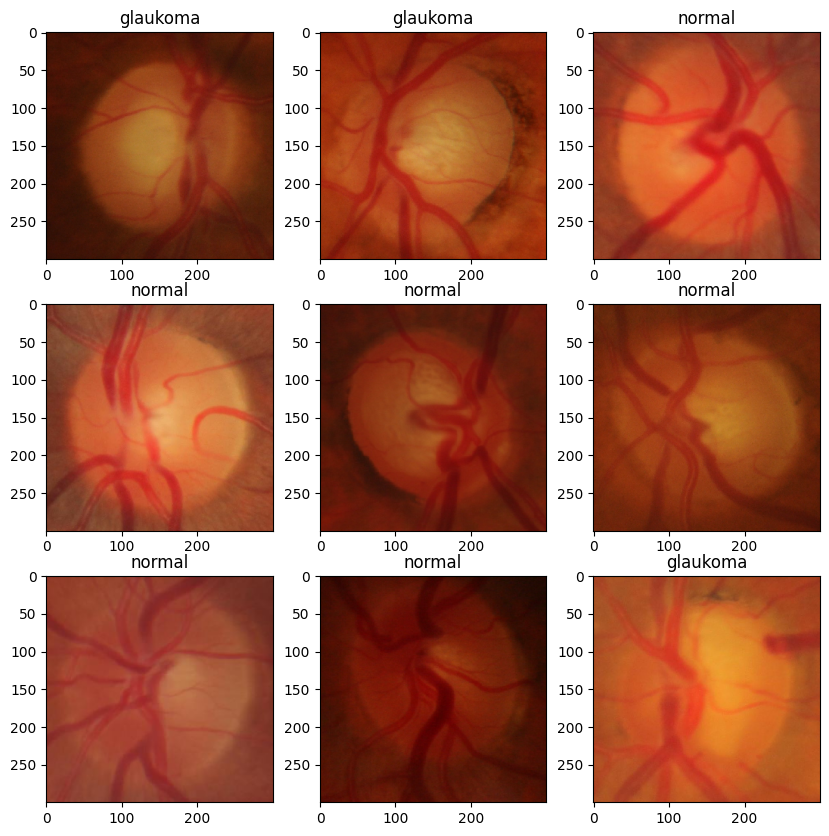

In [43]:
fig_row = 3
fig_col = 3
position = (s1_rimone_src.batch_index - 1) * s1_rimone_src.batch_size
plt.figure(figsize=(10, 10))
for i in range (fig_row * fig_col):
    plt.subplot(fig_row, fig_col, i+1)
    image = s1_rimone_src.next()
    plt.title(list(s1_rimone_src.class_indices.keys())[int(image[1][0])])
    plt.imshow(image[0][0])
    # plt.title(list(s1_rimone_src.class_indices.keys())[int(s1_rimone_src[i][1][0])])
    # plt.imshow(s1_rimone_src[i][0][0])
    # plt.axis('off')